# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Import libraries

In [13]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

# Read CSVs

In [14]:
# Consumption at current prices
consumption_df = pd.read_csv('data-resource_2016_11_20_Consumption at current prices 2012-16.csv')
# GDP at Current and Constant Market Prices
current_constant_gdp_df = pd.read_csv('data-resource_2016_11_20_GDP at Current and Constant Market Prices 2012-16.csv')
# GNI at Current and Constant Market Prices
gni_df = pd.read_csv('data-resource_2016_11_20_GNI at Current and Constant Market Places 2012-16.csv')
# Savings and Investments
savings_investments_df = pd.read_csv('data-resource_2016_11_20_Savings and Investments 2012-16.csv')

# The following csv is different in format from the others
# So it needs some additional cleaning

# Nominal and Real GDP
# Skip rows 1 to 6 (zero based indexing)
# Skip last row using skipfooter
# To keep only the years from 2012 to 2015 to conform to the rest of the datasets
nominal_real_gdp_df = pd.read_csv('data-resource_2016_11_20_Nominal and Real GDP 2007-16.csv', skiprows=range(1, 7), skipfooter=1, engine='python')
# Rename columns 1 and 2 for clarity and removing unnamed values
nominal_real_gdp_df.columns.values[1] = 'Nominal Growth Rate'
nominal_real_gdp_df.columns.values[2] = 'Real Growth Rate'

consumption_df
# current_constant_gdp_df
# gni_df
# nominal_real_gdp_df
# savings_investments_df

,Indicator,2012-13,2013-14,2014-15,2015-16(p)
0,Consumption at current prices (billion Tk.),9347,10469,11799,13163
1,Private consumption (billion Tk.),8734,9751,10980,12144
2,Public consumption (billion Tk.),613,717,819,1019


# Set the first column as index
# Remove the name of the new index (Reassign to '')
# Transpose

In [15]:
# Set index to first column

# Set index to column 'Indicator'
consumption_df.set_index('Indicator', inplace=True)
current_constant_gdp_df.set_index('Indicator', inplace=True)
gni_df.set_index('Indicator', inplace=True)
savings_investments_df.set_index('Indicator', inplace=True)
# Set index to column 'Period'
nominal_real_gdp_df.set_index('Period', inplace=True)

# Set index name to ''

# Set the index name from Indicator to ''
consumption_df.index.name = ''
current_constant_gdp_df.index.name = ''
gni_df.index.name = ''
savings_investments_df.index.name = ''
# Set the index name from Period to ''
nominal_real_gdp_df.index.name = ''

# Transpose the first four DataFrames
# To match with the 5th
consumption_df = consumption_df.T
# drop the first column of consumption_df as it will not be used
consumption_df.drop(consumption_df.columns[0], axis=1, inplace=True)
current_constant_gdp_df = current_constant_gdp_df.T
gni_df = gni_df.T
savings_investments_df = savings_investments_df.T

# Rename index values to only the years

In [16]:
# my_dict = {'2012-13' : '2012'}
# consumption_df.rename(my_dict, inplace=True)

# indexes holds current index values
indexes = consumption_df.index.tolist()
# index_values_dict will hold the old_value:new_value pairs
index_values_dict = {}

for index in indexes:
#     split old value by '-'
#     get the first string (the year)
    new_index_value = index.split('-')[0]
#     enter new dictionary key:value pair
    index_values_dict[index] = new_index_value

# the other DataFrames have the asterist
# which consumption_df is missing
index_values_dict['2015-16(p*)'] = 2015

# rename DataFrames using index_values_dict
consumption_df.rename(index_values_dict, inplace=True)
current_constant_gdp_df.rename(index_values_dict, inplace=True)
gni_df.rename(index_values_dict, inplace=True)
savings_investments_df.rename(index_values_dict, inplace=True)

In [17]:
# my_string = re.search('\d{4,5}$', 'FY2015')
# my_string.group(0)

# do the same for nominal_real_gdp_df

indexes = nominal_real_gdp_df.index.tolist()
index_values_dict = {}

for index in indexes:
#     get the last 4 digits
    match_obj = re.search('\d{4}$', index)
#     get the first group (the year) from the MatchObject
    new_index_value = match_obj.group(0)
    index_values_dict[index] = new_index_value

nominal_real_gdp_df.rename(index_values_dict, inplace=True)

# Remove '(Billion Tk.)' if it is present in any column

In [18]:
# returns a dictionary
# to remove the part after the bracket from some DataFrames
def get_column_dict(df):
    columns = df.columns.tolist()
    column_values_dict = {}
    
    for column in columns:
#         split old value by '('
#         get the first string (the part before '(')
        new_column_value = column.split('(')[0]
#         remove whitespaces
        new_column_value = new_column_value.strip()
        column_values_dict[column] = new_column_value
    
    return column_values_dict

consumption_df.rename(columns=get_column_dict(consumption_df), inplace=True)
current_constant_gdp_df.rename(columns=get_column_dict(current_constant_gdp_df), inplace=True)
gni_df.rename(columns=get_column_dict(gni_df), inplace=True)
savings_investments_df.rename(columns=get_column_dict(savings_investments_df), inplace=True)

# Give a name to each DataFrame

In [19]:
consumption_df.name = 'Private and public consumption'
current_constant_gdp_df.name = 'GDP at current and constant prices'
gni_df.name = 'GNI at current and constant prices'
savings_investments_df.name = 'Private and public savings'
nominal_real_gdp_df.name = 'Nominal and Real GDP growth rate'

# Plotting
# Specify colors
# Define function for convenience
# Plot vertically

<IPython.core.display.Javascript object>


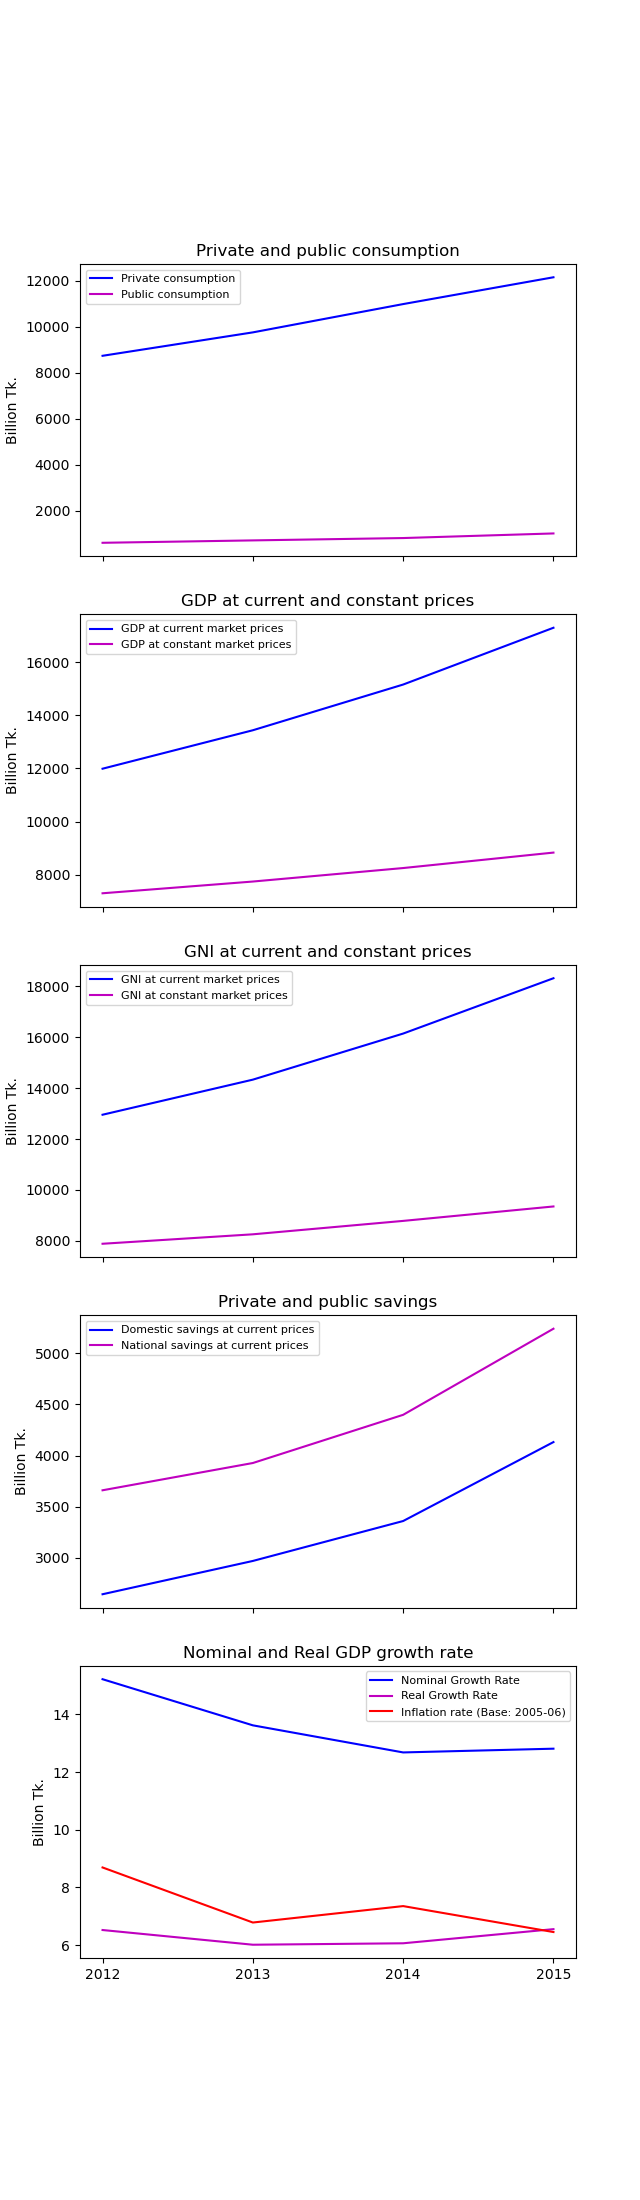

In [20]:
# lines will be colored
# in order of plot
# based on color_list
color_list = ['b', 'm', 'r']

# create 5 subplots vertically with their shared x-axis on the column
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex='col')
# set figure height to 22
fig.set_figheight(22)

# function to plot all columns of specified DataFrame, df
# on the specified axes, ax
def plot_for_df(df, ax):
#     specifies which color to use for current line
    color_num = int(0)
    df_indexes = df.index.tolist()
    
    for column in df:
        ax.plot(df_indexes, df[column], label=column, c=color_list[color_num])
        color_num += 1
        
    ax.legend(loc=2, prop={'size': 8})
#     Set ylabel to specify Billion Tk.
    ax.set_ylabel('Billion Tk.')
#     set title of ax to the name of df
    ax.set_title(df.name)
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
#     ax.spines['left'].set_visible(False)

plot_for_df(consumption_df, ax1)
plot_for_df(current_constant_gdp_df, ax2)
plot_for_df(gni_df, ax3)
plot_for_df(savings_investments_df, ax4)
plot_for_df(nominal_real_gdp_df, ax5)
_ = ax5.legend(loc=1, prop={'size': 8})

# The following cells are used for testing and debugging

In [21]:
# Index object is turned into list
# in for loop
# for value in consumption_df.index:
#     print(value)

In [22]:
# consumption_df
# current_constant_gdp_df
# gni_df
# savings_investments_df
# nominal_real_gdp_df

In [23]:
# plt.plot([1, 2, 3, 4])

In [24]:
# iterating over DataFrame
# retrieves column names
# during each iteration
# for column in consumption_df:
#     print(column)

In [26]:
# plt.savefig('bangladesh_economic_activity.png')